### House Price Prediction

### Linear Regression:
    Since house price is a continues variable, this is a regression problem

In [ ]:
import os
os.getcwd()
os.chdir(r'C:\Users\Desktop')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Housing.csv')

In [3]:
#Shape Of the Data
data.shape

(5000, 7)

### Understanding the Data

In [4]:
#Head Of Data
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [6]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [7]:
df=data.copy()

In [69]:
df.columns=['Avg_Income','Avg_House_Age','Avg_No# of Rooms','Avg_No# of Bedrooms','Population','Price','Address']

In [70]:
df.columns

Index(['Avg_Income', 'Avg_House_Age', 'Avg_No# of Rooms',
       'Avg_No# of Bedrooms', 'Population', 'Price', 'Address'],
      dtype='object')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Income           5000 non-null   float64
 1   Avg_House_Age        5000 non-null   float64
 2   Avg_No# of Rooms     5000 non-null   float64
 3   Avg_No# of Bedrooms  5000 non-null   float64
 4   Population           5000 non-null   float64
 5   Price                5000 non-null   float64
 6   Address              5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [72]:
df.describe()

,Avg_Income,Avg_House_Age,Avg_No# of Rooms,Avg_No# of Bedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [73]:
#Missing Value
df.isna().sum()

Avg_Income             0
Avg_House_Age          0
Avg_No# of Rooms       0
Avg_No# of Bedrooms    0
Population             0
Price                  0
Address                0
dtype: int64

<AxesSubplot:>

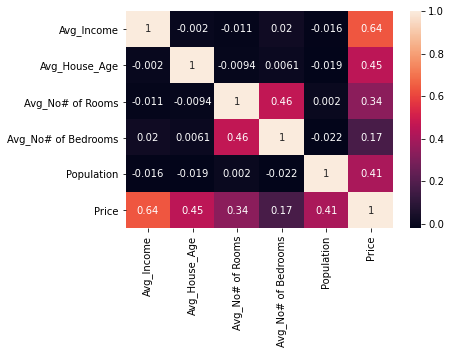

In [75]:
sns.heatmap(df.corr(), annot=True)

In [76]:
X = df[['Avg_Income','Avg_House_Age','Avg_No# of Rooms','Avg_No# of Bedrooms','Population']]
y = df['Price']

In [77]:
import statsmodels.api as sm
X2=sm.add_constant(X)
ols=sm.OLS(y,X2)
lr=ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        03:43:06   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.637e+06   1

In [78]:
# Backward Feature Elimination

while(lr.pvalues.max() > 0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.398e+04
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        03:43:07   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4995   BIC:                         1.295e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.638e+06   1.72e+04  

In [79]:
# For cross Validation using Train and Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1, test_size=0.2)

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9215935236936301

In [81]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import math
print(f'The R^2 Value: {r2_score(y_test,y_pred)}\n') # It give you the R^2 Value
print(f'The MSE Value: {mean_squared_error(y_test,y_pred)}\n') # It give you the Mean Square Error (MSE) Value
print(f'The RMSE Value: {math.sqrt(mean_squared_error(y_test,y_pred))}\n')# It give you the Root Mean Square Error (RMSE) Value

The R^2 Value: 0.9215935236936301

The MSE Value: 10543597313.625555

The RMSE Value: 102682.02040097164



In [82]:
# K-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=5).mean()

0.9175592097606863

In [83]:
# Dimention of data

n= len(X_test)
k= len(X_test.iloc[0])
R2 = r2_score(y_test,y_pred)
R2

0.9215935236936301

In [84]:
# Adj R^2 is useful in Multiple Regression
# As it accounts for number of variables in the scoring

Adj_R2 = 1 - ((n-1)*(1-R2)/(n-k-1))
print(Adj_R2)

0.9211991249194532


### Conclusion : 
    As we can see from R^2 value and K Fold Vlaue we are getting close to 1 
    Eventhough its small dataset we can conside it as a best fit model.
    
    